In [119]:
import numpy as np
from matplotlib import pyplot as plt

In [120]:
def read_grid_data(filename):
    """
    Reads a TXT file of the form:
      Line 1: "Nx Ny Nz"   (grid dimensions)
      Line 2: Field names, for example "vel_x vel_y vel_z density"
      Subsequent lines: "ix iy iz value_1 value_2 ... value_n"
    
    Returns:
      A dictionary: {field_name: 3D numpy array of shape (Nx, Ny, Nz), ...}
    """
    with open(filename, 'r') as f:
        # 1) Read grid dimensions
        Nx, Ny, Nz = map(int, f.readline().split())
        
        # 2) Read field names
        field_names = f.readline().split()
        n_fields = len(field_names)
        
        # Initialize empty NumPy arrays for each field
        data_dict = {}
        for field in field_names:
            data_dict[field] = np.zeros((Nx, Ny, Nz), dtype=float)
        
        # 3) Read the remaining lines containing grid indices and field values
        for line in f:
            parts = line.strip().split()
            if len(parts) < 3 + n_fields:
                # Skip any malformed lines
                continue
            
            # Grid indices (assuming 1-based from the format description)
            ix = int(parts[0]) - 1
            iy = int(parts[1]) - 1
            iz = int(parts[2]) - 1

            # Corresponding field values
            values = parts[3:]  # list of strings
            for i, field in enumerate(field_names):
                data_dict[field][ix, iy, iz] = float(values[i])

    return data_dict

In [121]:
outfile = r'C:\Data\Work\Code\LBM\LBM_3D_GPU\Data\Output\last_frame.txt'
data = read_grid_data(outfile)
shape = data[list(data.keys())[0]].shape

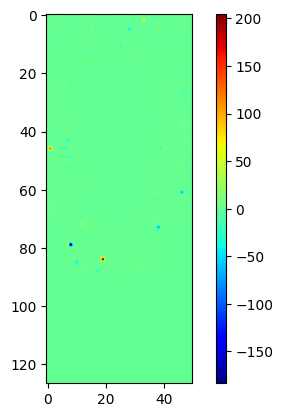

In [122]:
plt.imshow(data['vel_x'][:, :, shape[2]//2], cmap = 'jet')
plt.colorbar(aspect = 40)
plt.show()